# Exploratory Data Analysis of Haberman Dataset

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#Read the dataset

haberman = pd.read_csv('haberman.csv')

In [3]:
haberman.head() #Observe top 5 rows

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haberman.tail() #Observe bottom 5 rows

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


#### Dataset attribute information

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)

-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year


In [5]:
haberman.shape #Display number of rows and columns in the dataset given

(306, 4)

In [6]:
haberman.describe() #statistical information of various attributes

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


##### Mean age of patients is 52.45 years, minimum being 30 and maximum being 83
##### Mean number of auxiliary nodes detected are 4, minimum being 0 and maximum being 52

In [7]:
haberman['status'].value_counts() 
# 1 - Patient survived 5 years or longer
# 2 - Patient died within 5 years

1    225
2     81
Name: status, dtype: int64

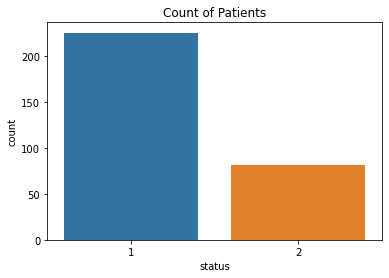

In [8]:
sns.countplot(haberman['status'])
plt.title('Count of Patients')
plt.show();

##### The number of people who died within 5 years is less than half the number of people who survived for 5 years or longer

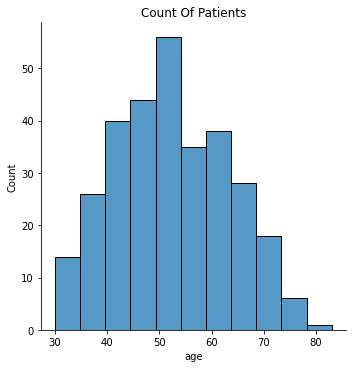

In [9]:
sns.displot(haberman['age'] , kind = 'hist')
plt.title('Count Of Patients')
plt.show();

##### The age group of people comprising of the study is mainly between 30 to 85, with maximum number of people having age in between 50 - 55

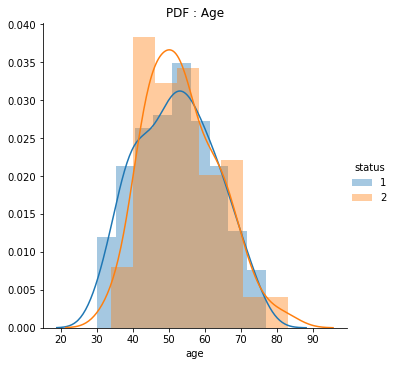

In [10]:
sns.FacetGrid(haberman,hue='status', size = 5).map(sns.distplot,'age').add_legend();
plt.title('PDF : Age')
plt.show();

##### There is no clear relation between the age of the patient and their survival status, but we can see that people around the age of 50 are most affected and chances of having status 2 is relatively high

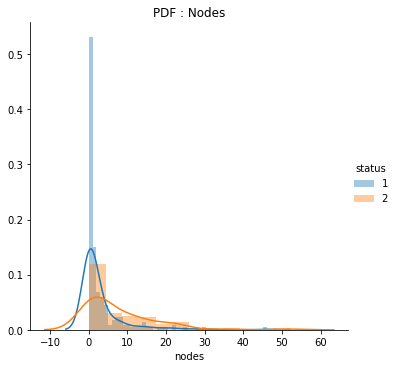

In [11]:
sns.FacetGrid(haberman,hue='status', size = 5).map(sns.distplot,'nodes').add_legend();
plt.title('PDF : Nodes')
plt.show();

##### For more number of auxiliary nodes identified, chances of survival become relatively less 

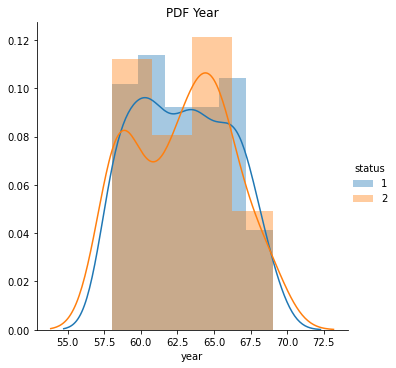

In [12]:
sns.FacetGrid(haberman,hue='status', size = 5).map(sns.distplot,'year').add_legend();
plt.title('PDF Year')
plt.show();

##### The year of operation does not seem to have a significant impact on survival status of the patient although there is a bit of difference in the early years

In [13]:
class1 = haberman[haberman['status'] == 1] #dataset of status 1 patients
class2 = haberman[haberman['status'] == 2] #dataset of status 2 patients

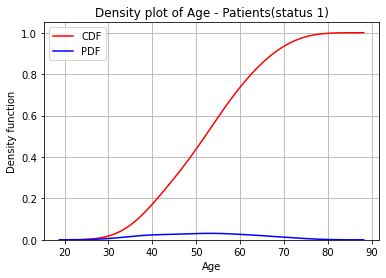

In [19]:
sns.kdeplot(x = class1['age'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class1['age'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of Age - Patients(status 1)')
plt.ylabel('Density function')
plt.xlabel('Age')
plt.legend()
plt.grid()
plt.show();

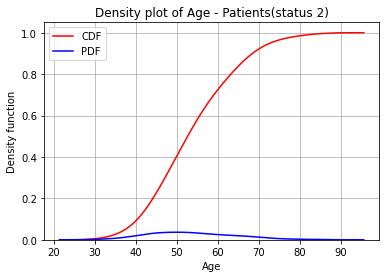

In [20]:
sns.kdeplot(x = class2['age'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class2['age'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of Age - Patients(status 2)')
plt.ylabel('Density function')
plt.xlabel('Age')
plt.legend()
plt.grid()
plt.show();

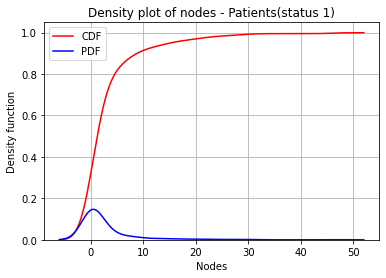

In [21]:
sns.kdeplot(x = class1['nodes'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class1['nodes'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of nodes - Patients(status 1)')
plt.ylabel('Density function')
plt.xlabel('Nodes')
plt.legend()
plt.grid()
plt.show();

##### Majority of the auxiliary nodes observed in patients of status 1 lie in the range of 0 to 7/8

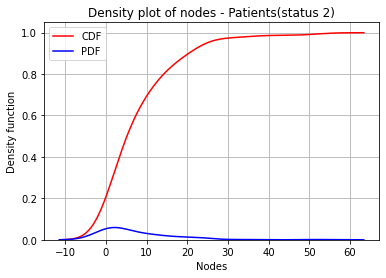

In [22]:
sns.kdeplot(x = class2['nodes'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class2['nodes'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of nodes - Patients(status 2)')
plt.ylabel('Density function')
plt.xlabel('Nodes')
plt.grid()
plt.legend()
plt.show();

##### Majority of nodes lie in range 0 to 10 for status 2 patients, but there are also nodes in range greater than 10 which were not observed for status 1 patients.

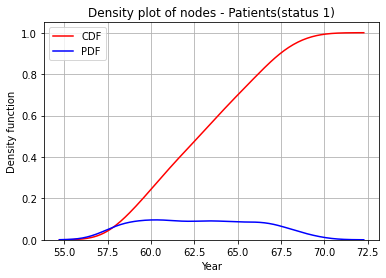

In [23]:
sns.kdeplot(x = class1['year'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class1['year'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of nodes - Patients(status 1)')
plt.ylabel('Density function')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.show();

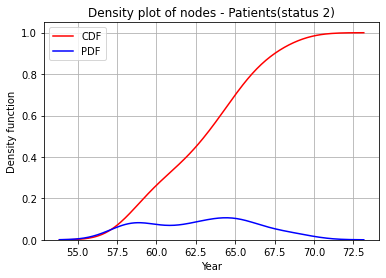

In [24]:
sns.kdeplot(x = class2['year'],cumulative = True, color = 'r', Label = 'CDF')
sns.kdeplot(x = class2['year'],cumulative = False, color = 'b', Label = 'PDF')
plt.title('Density plot of nodes - Patients(status 2)')
plt.ylabel('Density function')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.show();

##### We can observe that slightly the status 2 patients' year of operation was overall earlier than status 1 patients, but not significantly.

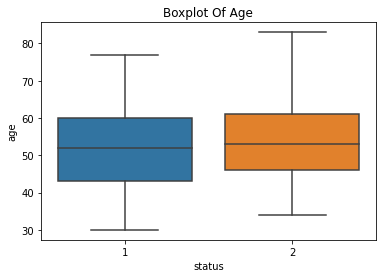

In [28]:
sns.boxplot(x = haberman['status'] , y = haberman['age'])
plt.title('Boxplot Of Age')
plt.show();

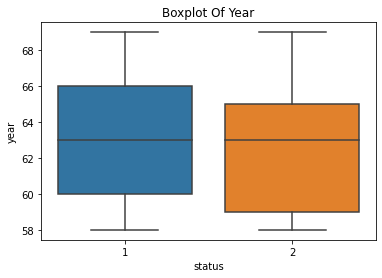

In [29]:
sns.boxplot(x = haberman['status'] , y = haberman['year'])
plt.title('Boxplot Of Year')
plt.show();

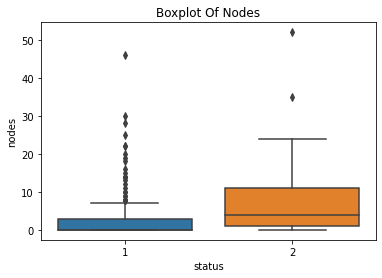

In [30]:
sns.boxplot(x = haberman['status'] , y = haberman['nodes'])
plt.title('Boxplot Of Nodes')
plt.show();

##### From the boxplot of nodes, we can observe that, patients having status 2 have relatively more number of  positive auxiliary nodes detected

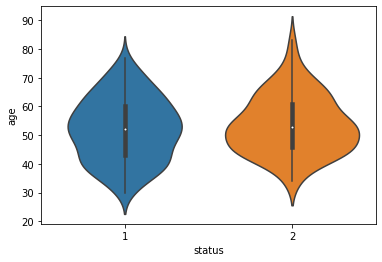

In [31]:
sns.violinplot(x = haberman['status'] , y = haberman['age'])

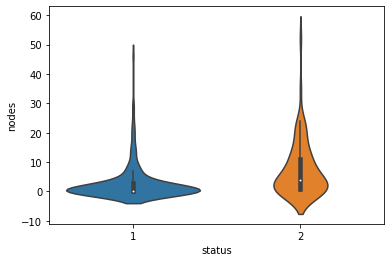

In [32]:
sns.violinplot(x = haberman['status'] , y = haberman['nodes'])

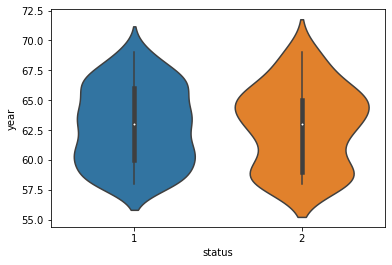

In [33]:
sns.violinplot(x = haberman['status'] , y = haberman['year'])

##### We can see through the violin plot of nodes that survival status 1 patients are mostly of patients having less number of positive auxiliary nodes and as the nodes increase, chance of being in survival status 2 also increase

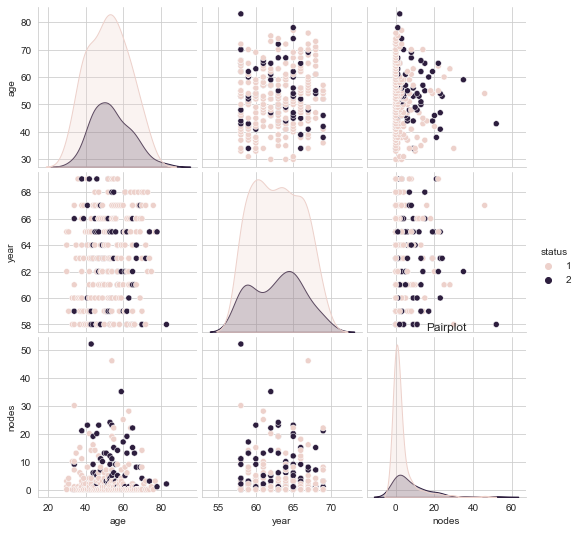

In [34]:
sns.set_style('whitegrid');
sns.pairplot(haberman , hue = 'status')
plt.title('Pairplot')
plt.show();

###### Very difficult to draw conclusions out of these bivariate plots, lots of overlap.
###### One observation we can make is that by seeing the scatterplot of nodes vs age. As number of nodes increases, chances of the patient having survival status 2 increases
 

### FINAL OBSERVATIONS :
#### 1. Majority of the data is overlapping which does not clearly guide us in determining which factor is the best in helping us to classify status 1 and status 2 patients
#### 2. We observed that if number of nodes are greater than 10, there is a very high chance of the patient being of status 2
#### 3. We can slightly observe that operations that were done relatively earlier have more status 2 patients. This may be because of unavaible medical advancements which might have been made in the future, But the difference observed is small.
#### 4. Age of a person does not indicate clearly the possibility of their survival status.
#### 5. So order of importance of features would be Nodes >  Year > Age 